# 1. Install and Import Dependencies

In [8]:
!pip install torch==1.8.1

  Using cached torch-1.8.1-cp39-cp39-win_amd64.whl (190.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.10.2
    Uninstalling torch-1.10.2:
      Successfully uninstalled torch-1.10.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.3 requires torch==1.10.2, but you have torch 1.8.1 which is incompatible.


In [9]:
!pip install cu111 torchvision==0.9.1

ERROR: Could not find a version that satisfies the requirement cu111 (from versions: none)
ERROR: No matching distribution found for cu111


In [4]:
!pip install cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement cu111 (from versions: none)
ERROR: No matching distribution found for cu111


In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [10]:
!cd yolov5 & pip install -r requirements.txt

  Using cached torch-1.10.2-cp39-cp39-win_amd64.whl (226.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.8.1
    Uninstalling torch-1.8.1:
      Successfully uninstalled torch-1.8.1


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\augus\Documents\YOLO-Drowsiness-Detection\YOLO\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\augus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-16 torch 1.11.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
#model

# 3. Make Detections with Images

In [3]:
import cv2
img = cv2.imread('Birds/IMAG0535.JPG')
#img = cv2.resize(img, (360, 480))
#cv2.imshow('test', img)

In [4]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Cygnus_olor_2_%28Marek_Szczepanek%29.jpg/220px-Cygnus_olor_2_%28Marek_Szczepanek%29.jpg'
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Courting_swan_on_Danube.jpg/220px-Courting_swan_on_Danube.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 143x220 1 bird
Speed: 170.0ms pre-process, 137.5ms inference, 7.8ms NMS per image at shape (1, 3, 416, 640)


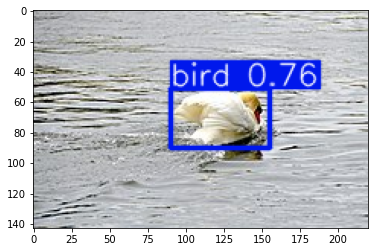

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[123, 124, 126],
         [122, 123, 125],
         [141, 142, 144],
         ...,
         [223, 226, 219],
         [222, 224, 219],
         [222, 224, 219]],
 
        [[168, 169, 171],
         [169, 170, 172],
         [150, 151, 153],
         ...,
         [179, 181, 176],
         [185, 187, 184],
         [191, 193, 190]],
 
        [[165, 166, 168],
         [173, 174, 176],
         [149, 150, 152],
         ...,
         [216, 217, 219],
         [208, 209, 213],
         [201, 202, 206]],
 
        ...,
 
        [[165, 165, 175],
         [157, 157, 165],
         [170, 170, 178],
         ...,
         [200, 203, 208],
         [201, 204, 209],
         [201, 204, 209]],
 
        [[183, 184, 189],
         [183, 184, 189],
         [201, 202, 207],
         ...,
         [200, 203, 208],
         [204, 207, 212],
         [207, 210, 215]],
 
        [[125, 126, 130],
         [119, 120, 122],
         [125, 126, 128],
         ...,
         [200, 203, 208],
  

# 4. Real Time Detections

In [27]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [8]:
import uuid   # Unique identifier
import os
import time

In [29]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [30]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [1]:
#!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [3]:
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [10]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
!cd yolov5 && python train.py --img 3024 --batch 1 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2021-7-11 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070 SUPER, 8192.0MB)

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [12]:
results = model(img)

In [13]:
results.print()

image 1/1: 480x640 1 awake
Speed: 16.0ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


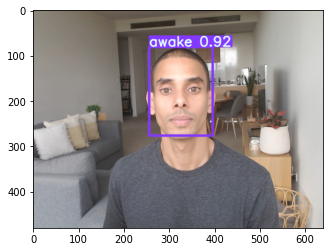

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()